num_frames_per_example 10
test predict


COMET INFO: old comet version (1.0.42) detected. current: 1.0.46 please update your comet lib with command: `pip install --no-cache-dir --upgrade comet_ml`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/eracah/self-supervised-survey/85a928fe020144208d60025ed4fd995c



85a928fe020144208d60025ed4fd995c
pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


/Users/evanracah/Dropbox/projects/gym/gym/logger.py:30: UserWarning: WARN: gym.spaces.Box autodetected dtype as <class 'numpy.uint8'>. Please provide explicit dtype.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


FlappyBirdDay-v0 FlappyBirdDay-v0
FlappyBirdDay-v0 FlappyBirdDay-v0
time for loading was 0.883802
looking for:  .models/predict/tdc/128FlappyBirdDay
No weights available for tdc. Using randomly initialized tdc
model save_dir: .models/predict/tdc/128FlappyBirdDay_None/nb_lr0.00025/85a928fe020144208d60025ed4fd995c


/usr/local/lib/python3.7/site-packages/torch/nn/functional.py:1961: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


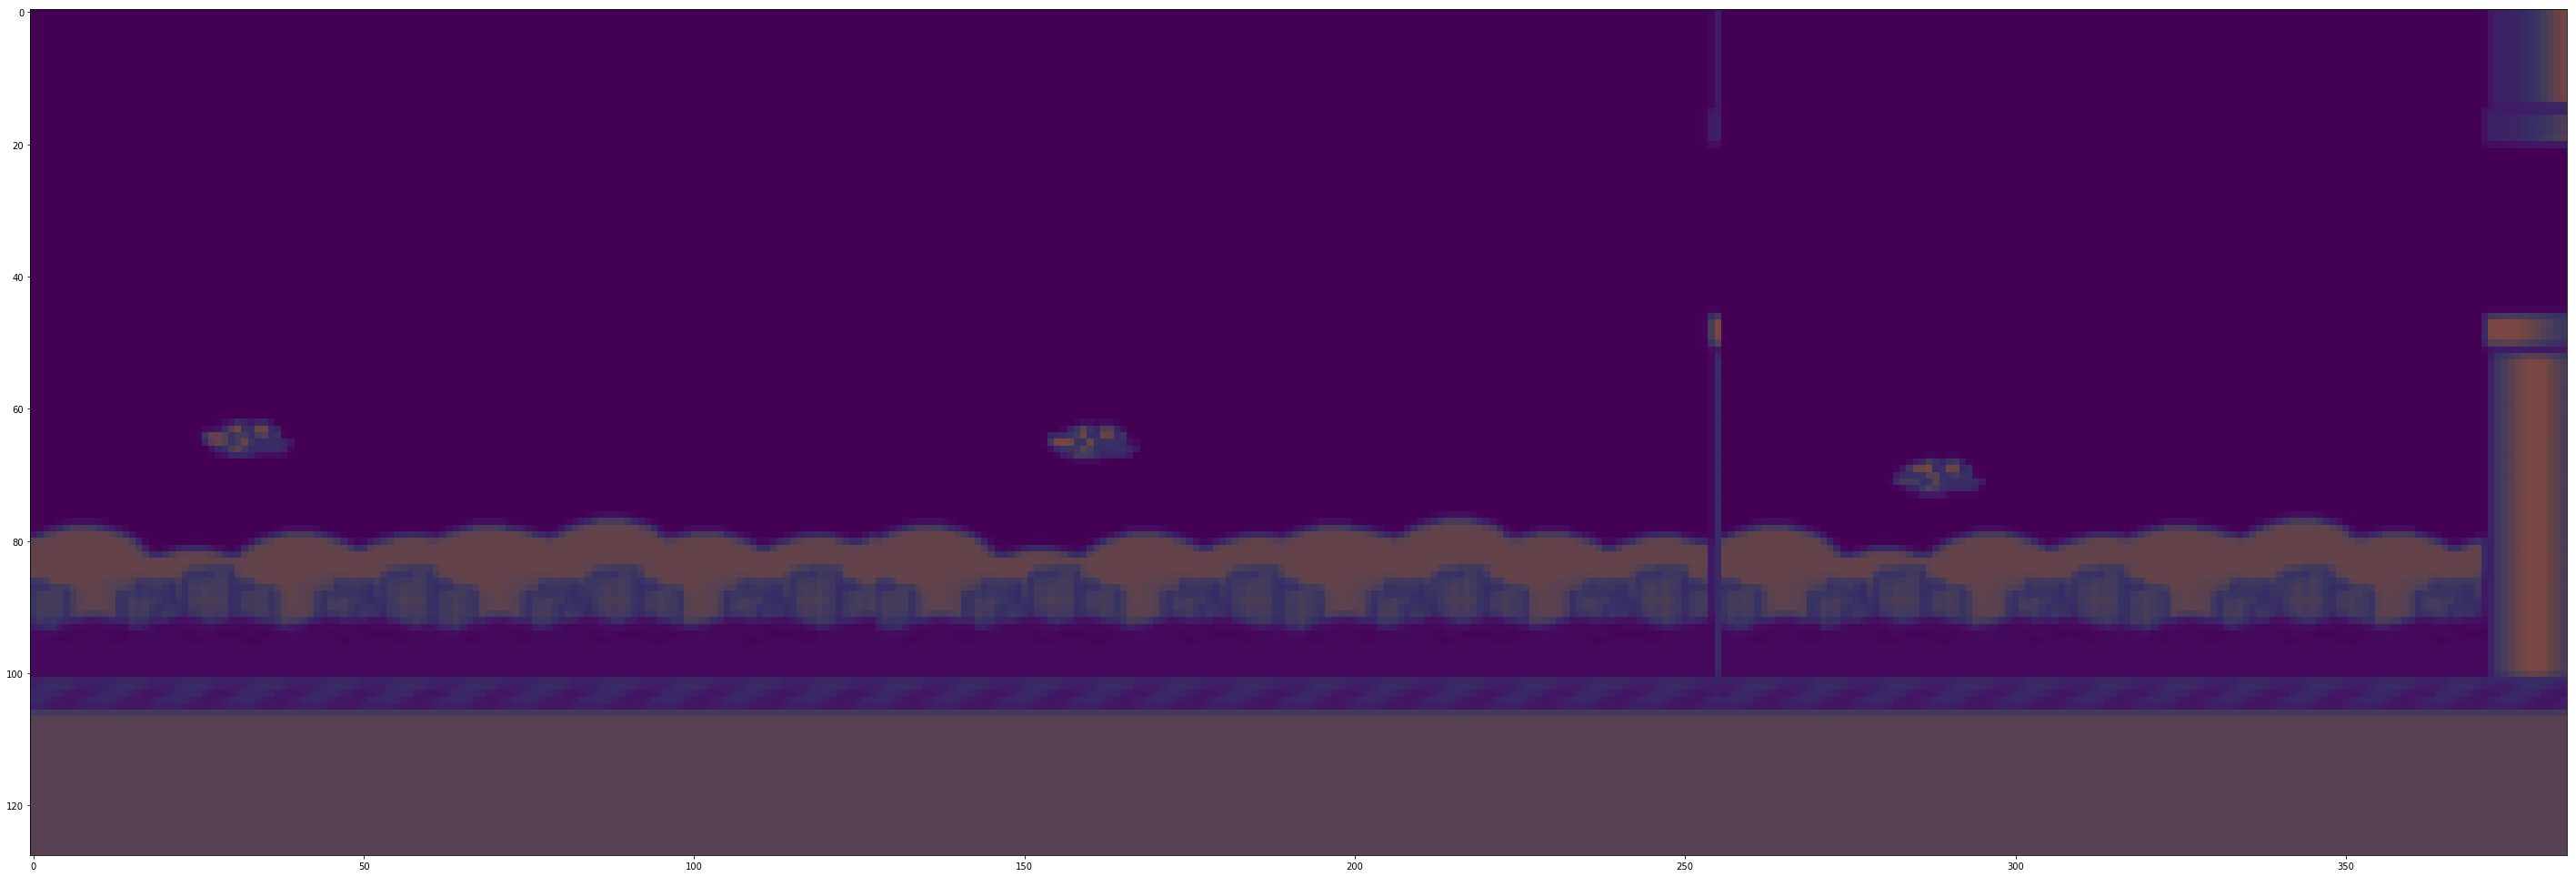

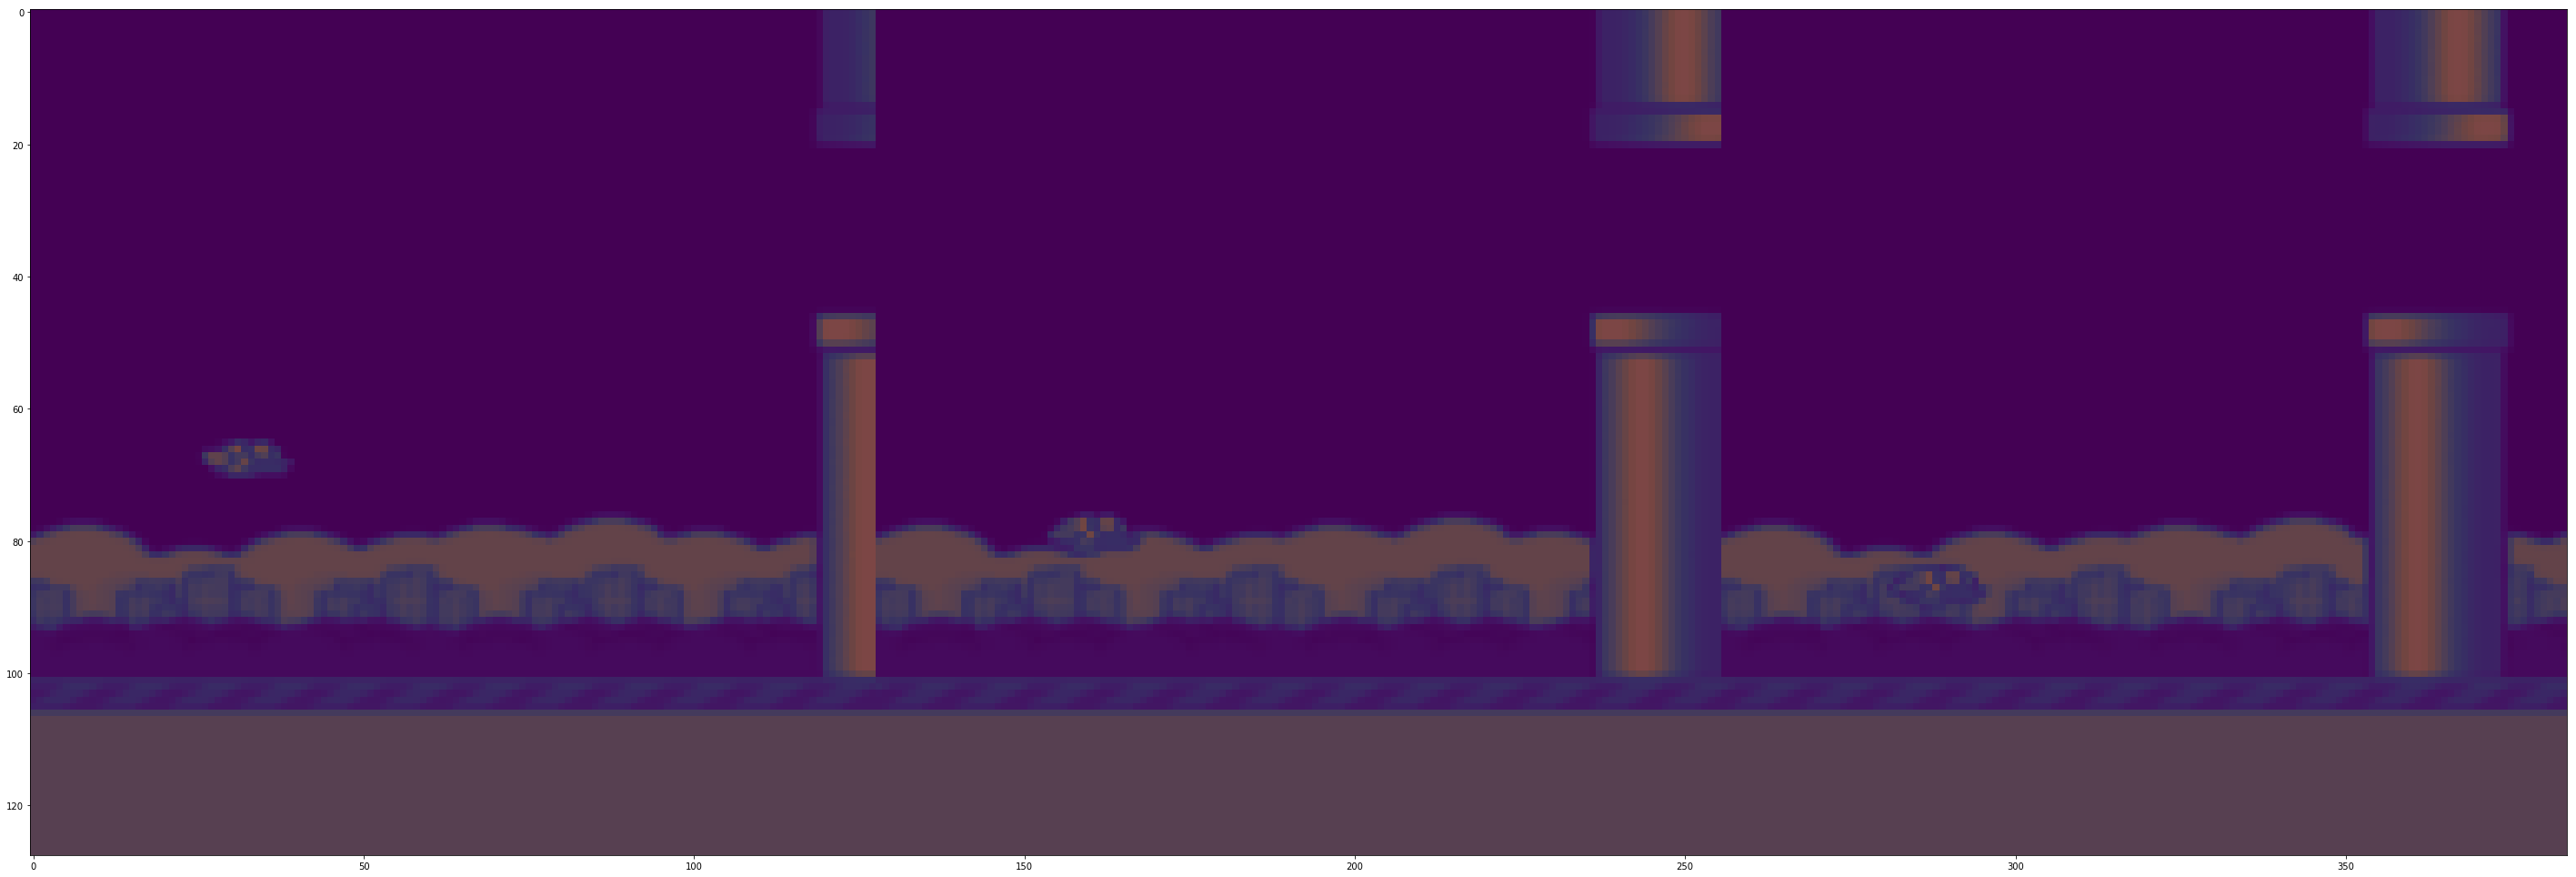

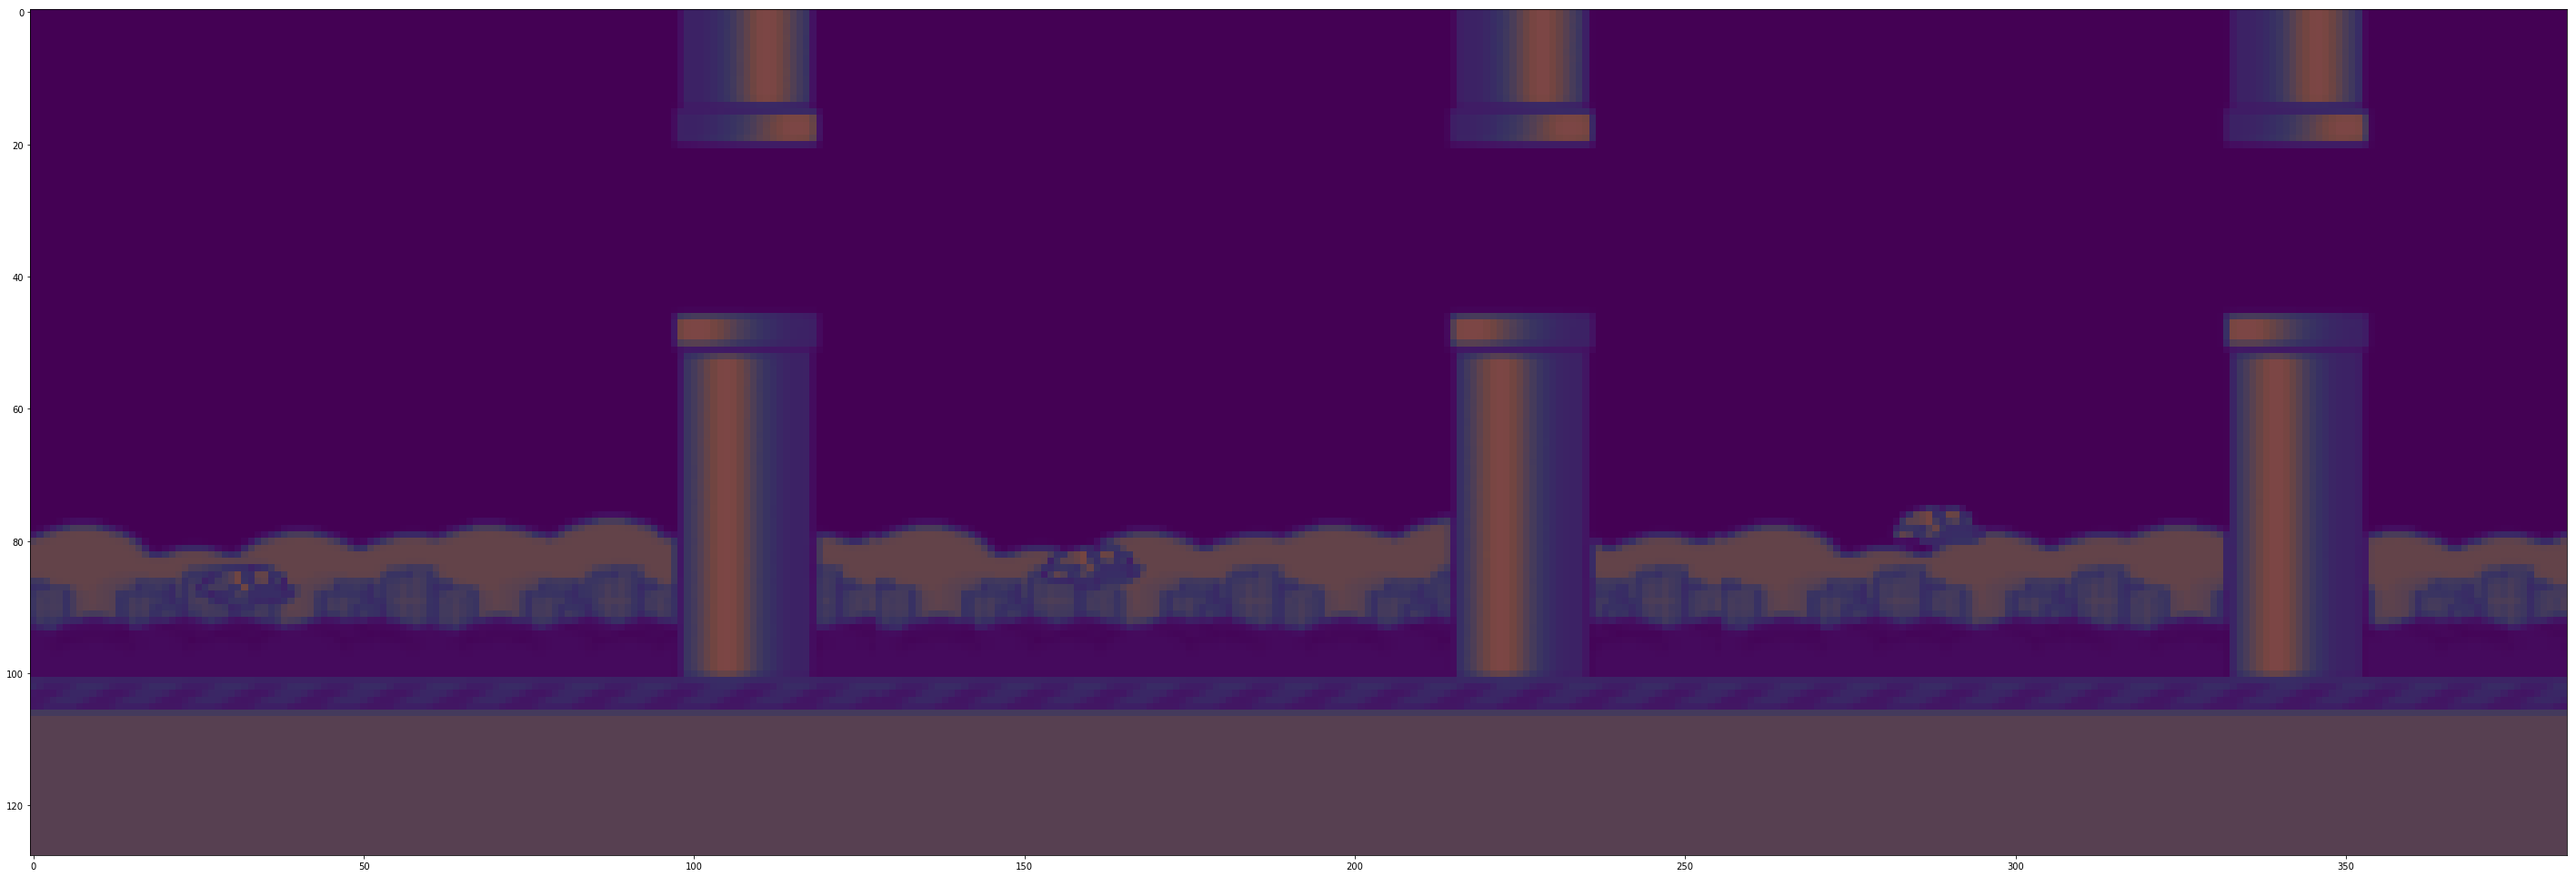

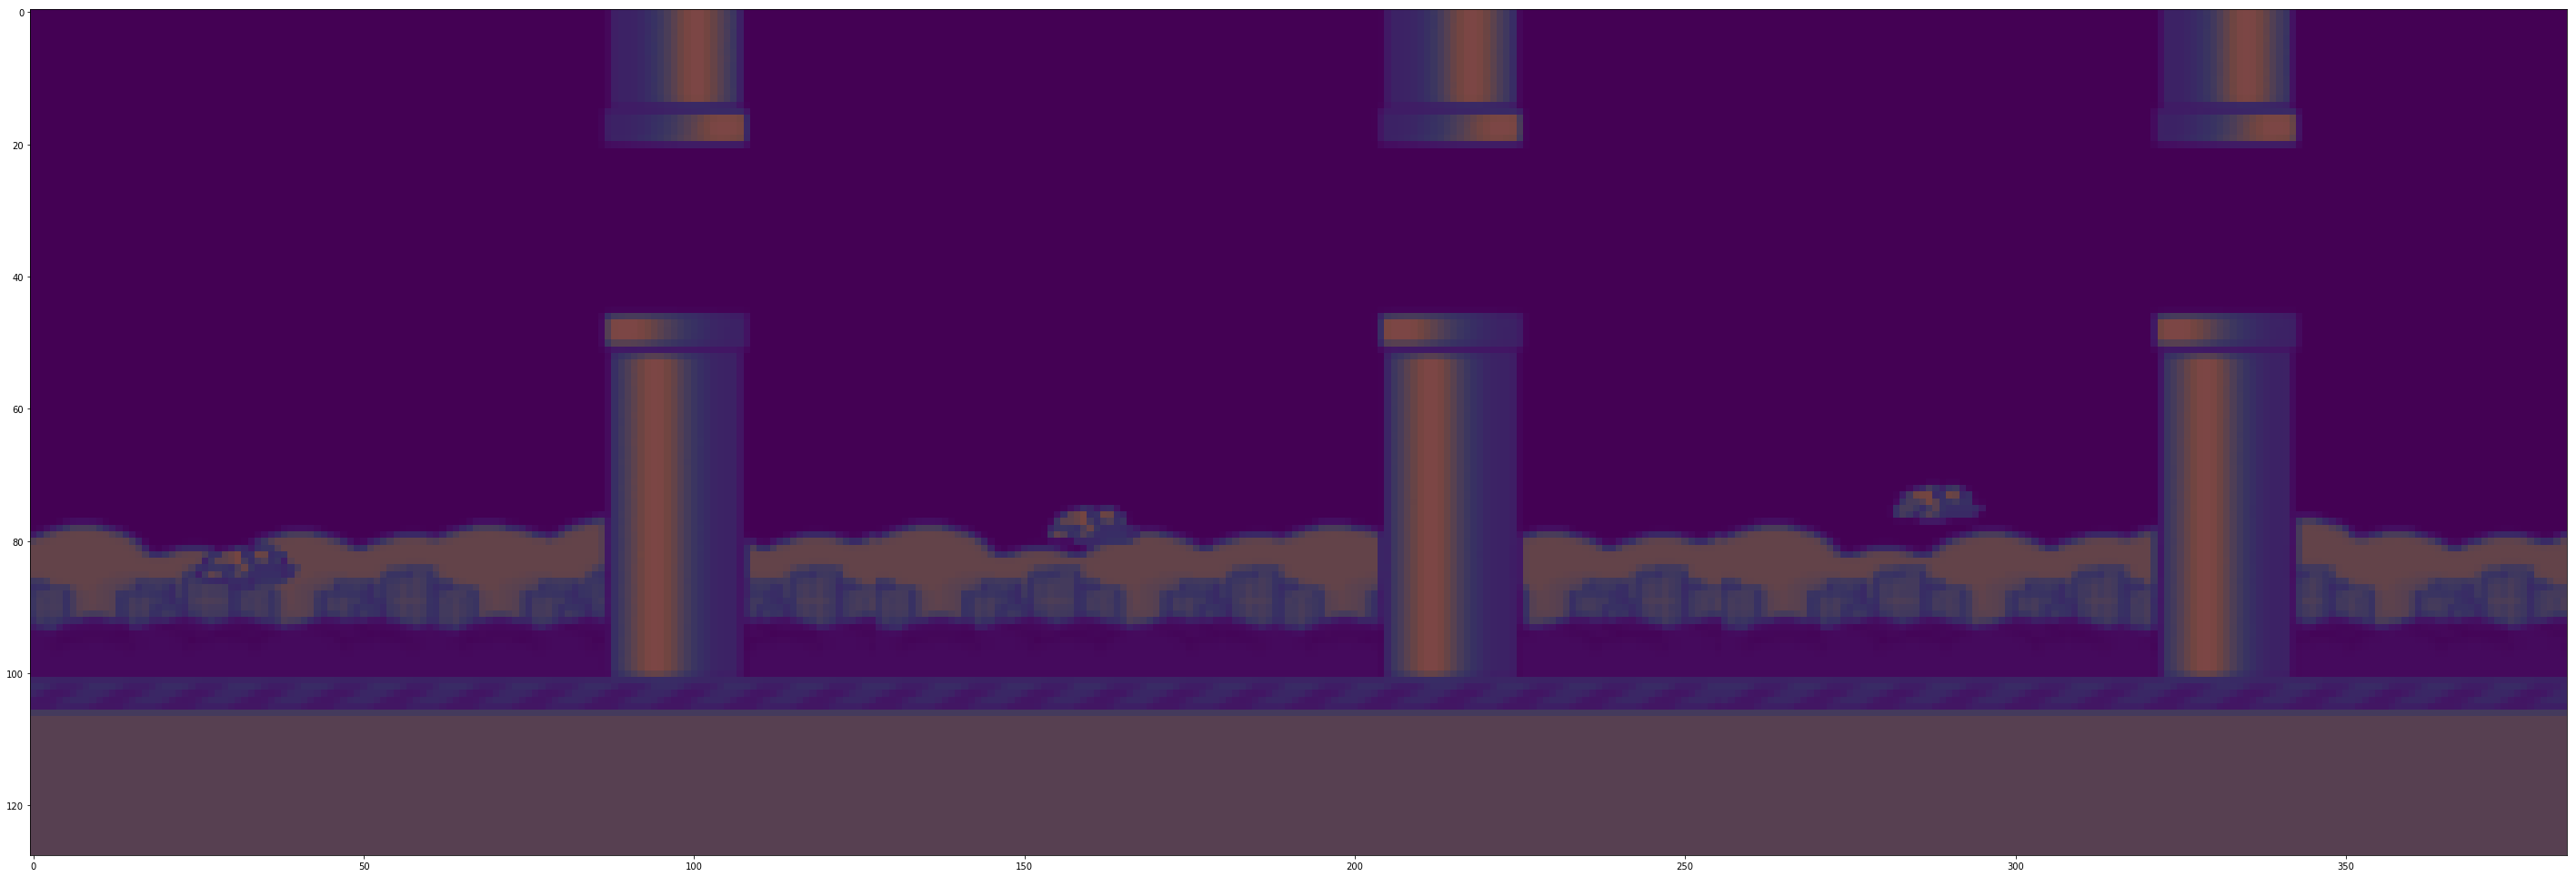

In [1]:
from comet_ml import Experiment # comet must come before any torch modules. I don't know why?
import random
from models.setup import setup_model
from data.env_utils.env_setup import setup_env
import argparse
from evaluations.utils import classification_acc
import argparse
import sys
import copy
import torch
from functools import partial
from torch import nn
from torch.optim import Adam, RMSprop
import numpy as np
from pathlib import Path
import time
from data.splitter import setup_tr_val_test
import os
from utils import get_child_dir, get_hyp_str, setup_args, setup_dir, setup_exp


# In[ ]:


def setup_all(args):        
    experiment, exp_id = setup_exp(args)
    print(exp_id)
    env=setup_env(args)
    del env
    experiment.log_parameters(args.__dict__)
    data = setup_tr_val_test(args)
    model = setup_model(args)
    model_dir = setup_dir(basename=".models",args=args,exp_id=exp_id)
    print("model save_dir: %s"%(str(model_dir)))
    ims_dir = setup_dir(basename=".images",args=args,exp_id=exp_id)
    return data, model, experiment, model_dir, ims_dir
    

if __name__ == "__main__":
    args = setup_args()
    print(args.mode,args.task)
    data, model, experiment, model_dir, ims_dir = setup_all(args)
 

from matplotlib import pyplot as plt
from torchvision.utils import make_grid
import numpy as np
from torch import nn
%matplotlib inline



def superimpose_seq_frames(encoder, test_set, fmap_index):

        for i,trans in enumerate(test_set):#= next(test_set.__iter__())

            x_example = trans.xs[1][:-1:3]

            fmap_model = list(encoder.children())[0]

            fmap = fmap_model(x_example)

            fmap_i = nn.functional.interpolate(fmap[:,fmap_index,None],size=x_example.shape[-2:],mode="bilinear")

            fm_grid = make_grid(fmap_i,nrow=10,padding=0)[0].detach().numpy()

            #plt.imshow(fm_grid)

            xgrid = make_grid(x_example,nrow=10,padding=0)[0].detach().numpy()

            fig = plt.figure(i,frameon=False,figsize=(50,50))
            plt.clf()
            im1 = plt.imshow(xgrid)
            im2 = plt.imshow(fm_grid, cmap=plt.cm.viridis, alpha=0.7)
            #experiment.log_figure(figure_name="it%i_ind%i"%(i,fmap_index),figure=fig)
            if i > 2:
                break
    

superimpose_seq_frames(model.encoder,data[0],119)